In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.1
    Uninstalling pip-21.2.1:
      Successfully uninstalled pip-21.2.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [4]:
  df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221153
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616684
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139938


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [6]:
df = df.drop(['Date','Adj Close'], axis=1)

In [7]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


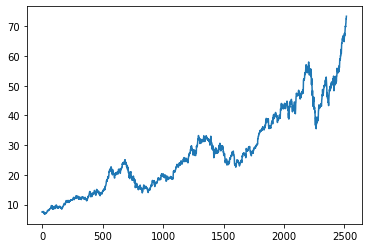

In [8]:
plt.plot(df['Close'])

In [9]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [10]:
ma100 = df['Close'].rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

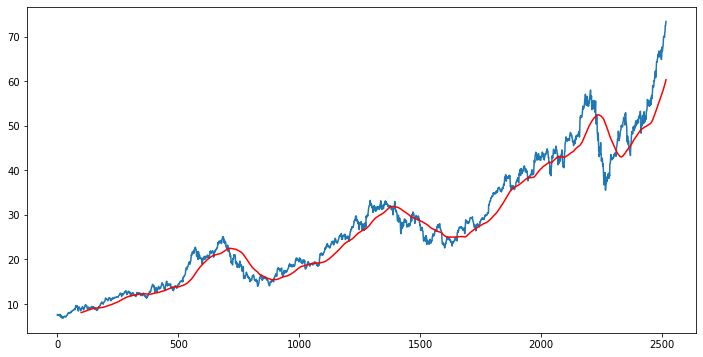

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.show()

In [12]:
#moving average
ma200 = df['Close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

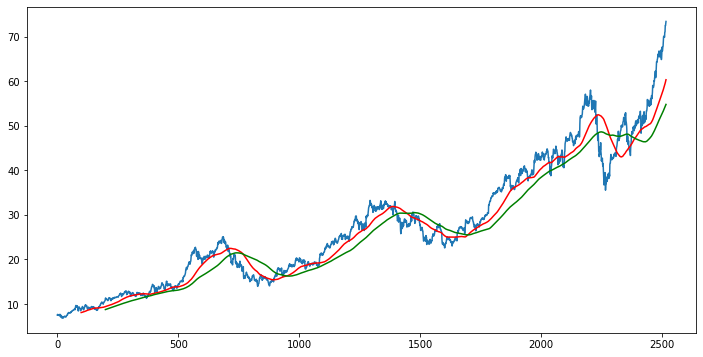

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [14]:
df.shape

(2517, 5)

In [15]:
#splitting data into training and testing

df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(df_train.shape)
print(df_test.shape)

(1761, 1)
(756, 1)


In [16]:
df_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
df_test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [18]:
#scaling of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
df_train_array = scaler.fit_transform(df_train)
df_train_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
df_train_array.shape

(1761, 1)

In [21]:
X_train = []
y_train = []

for i in range(100,df_train_array.shape[0]):
    X_train.append(df_train_array[i-100: i])
    y_train.append(df_train_array[i, 0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [27]:
X_train.shape

(1661, 100, 1)

In [38]:
pip install keras

     ---------------------------------------- 1.6/1.6 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow


  Using cached tensorflow-2.9.0-cp39-cp39-win_amd64.whl (444.0 MB)

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\hp\\appdata\\local\\programs\\python\\python39\\Lib\\site-packages\\tensorflow\\core\\protobuf\\rewriter_config_pb2.py'
Consider using the `--user` option or check the permissions.




     -------------------------------------- 444.0/444.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 904.1/904.1 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 kB 3.8 MB/s eta 0:00:00
     --------------------

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [33]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 14s 184ms/step - loss: 0.0722
Epoch 2/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0152
Epoch 3/50
52/52 [==============================] - 11s 211ms/step - loss: 0.0108
Epoch 4/50
52/52 [==============================] - 11s 206ms/step - loss: 0.0100
Epoch 5/50
52/52 [==============================] - 11s 205ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 11s 213ms/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 11s 216ms/step - loss: 0.0081
Epoch 8/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0079
Epoch 10/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0080
Epoch 11/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0081
Epoch 12/50
52/52 [==============================] - 12s 238ms/step - loss: 0.0068
Epoch 13/50
52

In [35]:
model.save('keras_model.h5')

In [36]:
df_test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [37]:
past_100_days = df_train.tail(100)

In [39]:
final_df = past_100_days.append(df_test, ignore_index=True)

In [40]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [42]:
input_data.shape

(856, 1)

In [43]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [44]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [45]:
#Making Predictions

y_predicted = model.predict(X_test)

24/24 [==============================] - 4s 59ms/step


In [46]:
y_predicted.shape

(756, 1)

In [47]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [48]:
y_predicted

array([[0.13440026],
       [0.13511333],
       [0.13575618],
       [0.13630274],
       [0.13673842],
       [0.13705666],
       [0.13726838],
       [0.13740465],
       [0.1375049 ],
       [0.13760291],
       [0.13772732],
       [0.1378888 ],
       [0.13809037],
       [0.13833874],
       [0.13863271],
       [0.13896438],
       [0.13932502],
       [0.13970378],
       [0.14009526],
       [0.14051276],
       [0.14096393],
       [0.14144853],
       [0.1419558 ],
       [0.14250499],
       [0.14318255],
       [0.14405124],
       [0.14515953],
       [0.14654726],
       [0.14814712],
       [0.14998199],
       [0.15205474],
       [0.15433788],
       [0.15680417],
       [0.15942603],
       [0.16216467],
       [0.16497473],
       [0.1678073 ],
       [0.17061888],
       [0.17338985],
       [0.1760966 ],
       [0.17871837],
       [0.18123713],
       [0.18366271],
       [0.18600857],
       [0.18828967],
       [0.19051445],
       [0.19268462],
       [0.194

In [49]:
scaler.scale_

array([0.02099517])

In [50]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

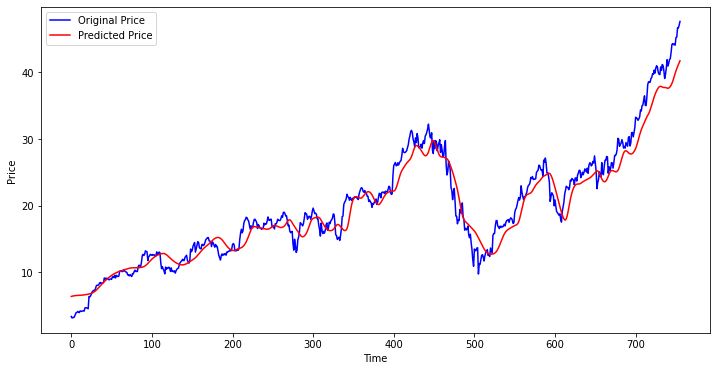

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()